In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download mohamedhamad21/spotify-tracks-dataset

Dataset URL: https://www.kaggle.com/datasets/mohamedhamad21/spotify-tracks-dataset
License(s): Apache 2.0
 86% 7.00M/8.17M [00:00<00:00, 13.4MB/s]
100% 8.17M/8.17M [00:00<00:00, 10.7MB/s]


In [38]:
!unzip \*.zip


Archive:  spotify-tracks-dataset.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
df = pd.read_csv('dataset.csv')


In [41]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [42]:
df.shape


(114000, 21)

In [43]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [44]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [46]:
df.isnull()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
#HANDLING NULL VALUES

In [48]:
df['artists']=df['artists'].fillna('x')
df['album_name']=df['album_name'].fillna('x')
df['track_name']=df['track_name'].fillna('x')

In [49]:
df = df.drop(['track_id','Unnamed: 0'], axis=1)
df.head(5)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [50]:
most_popular_artists = df.sort_values(by='popularity', ascending=False).iloc[:5]

most_popular_artists[['artists', 'popularity','track_name']]

,artists,popularity,track_name
20001,Sam Smith;Kim Petras,100,Unholy (feat. Kim Petras)
81051,Sam Smith;Kim Petras,100,Unholy (feat. Kim Petras)
51664,Bizarrap;Quevedo,99,"Quevedo: Bzrp Music Sessions, Vol. 52"
81210,David Guetta;Bebe Rexha,98,I'm Good (Blue)
89411,Manuel Turizo,98,La Bachata


In [51]:
genre_counts = df['track_genre'].value_counts()
print("\nNumber of tracks in each genre:")
print(genre_counts)


Number of tracks in each genre:
track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


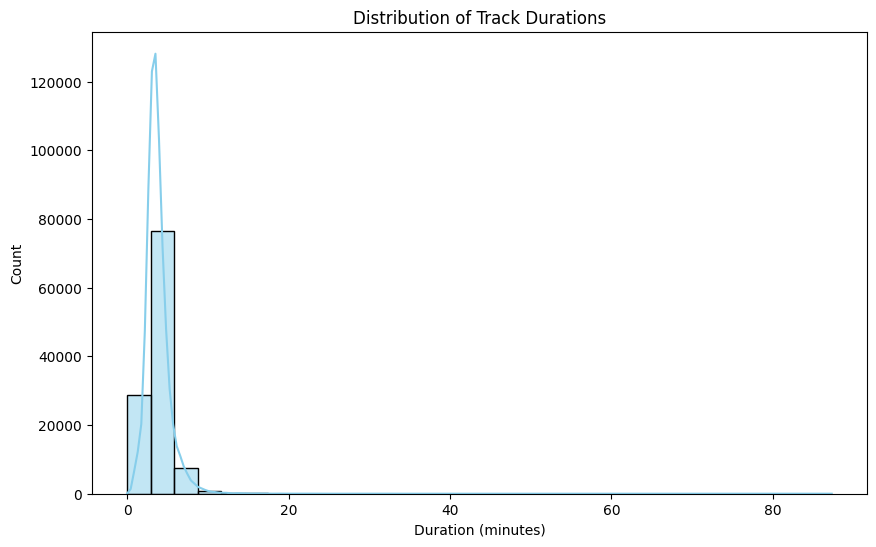

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'] / 60000, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

<ipython-input-53-002d0c77a70c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette='coolwarm')


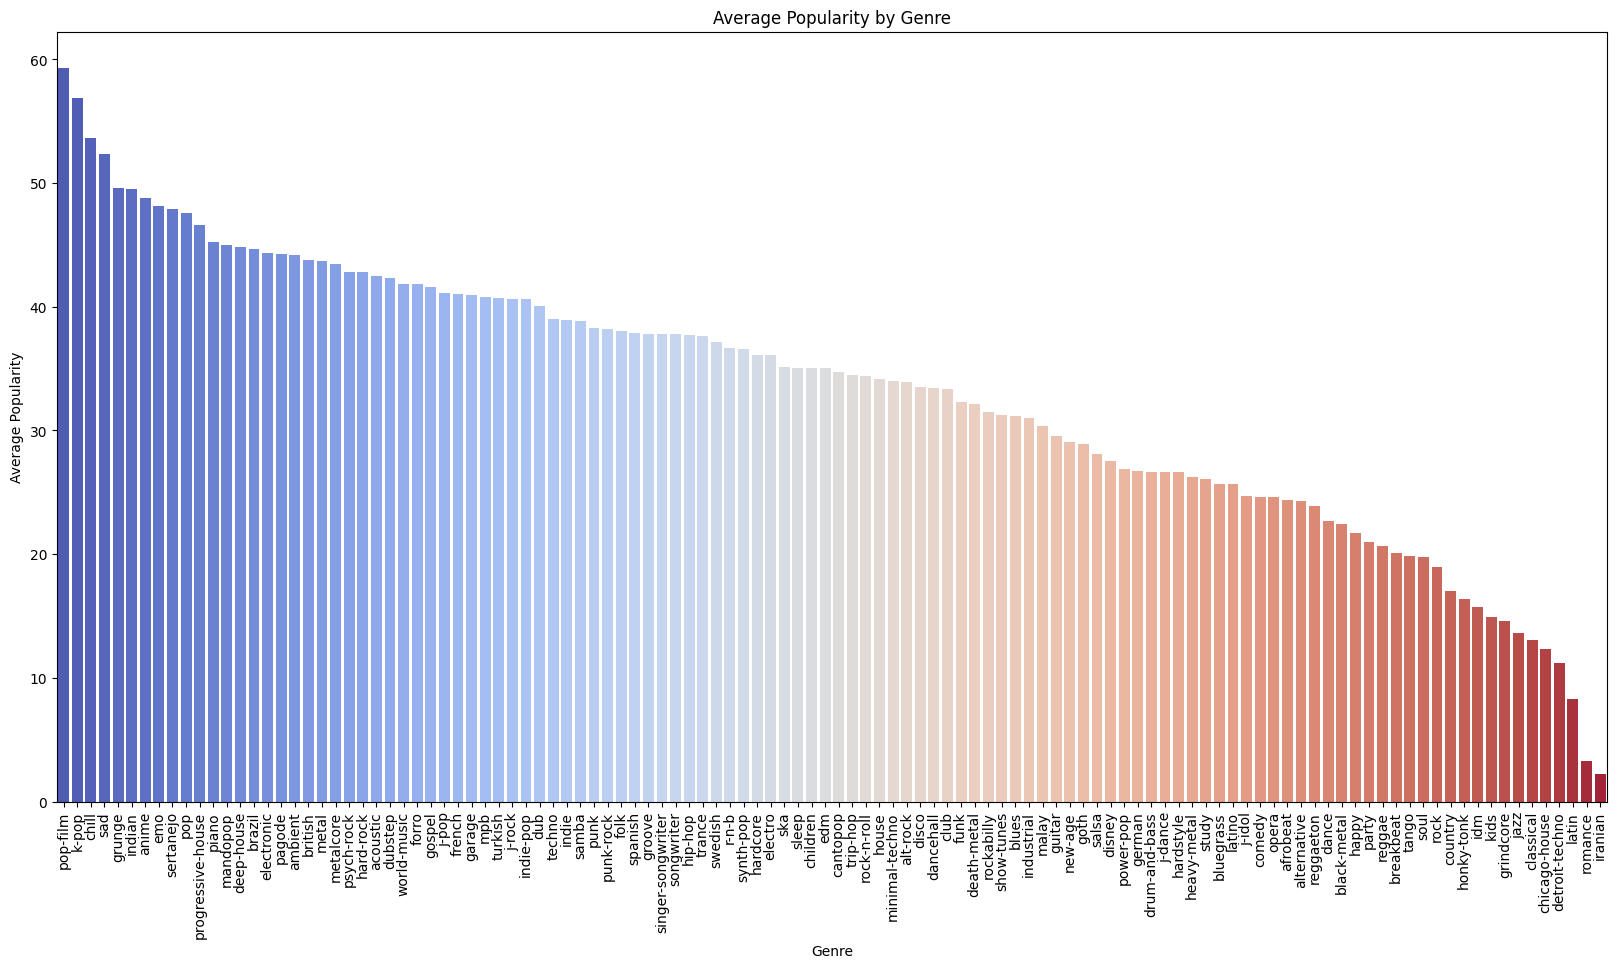

In [53]:
avg_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette='coolwarm')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

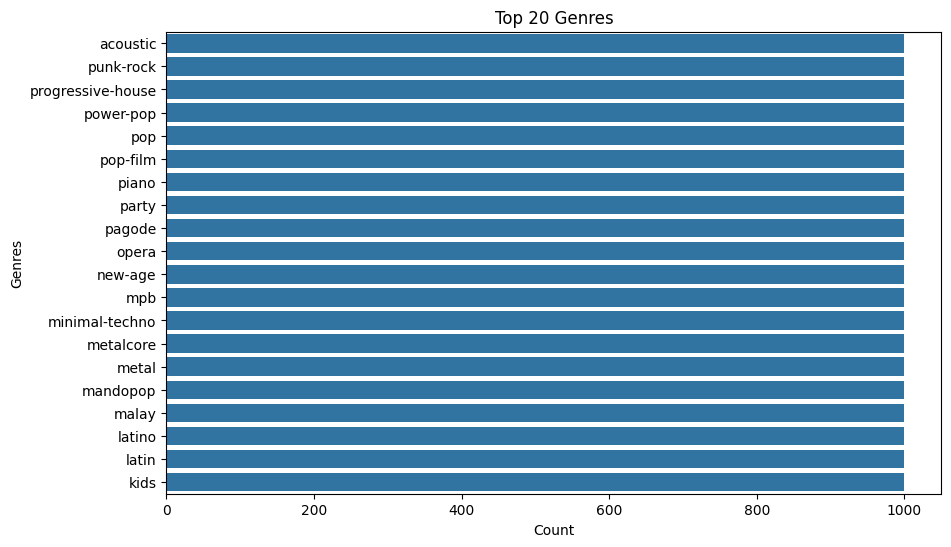

In [54]:
music_genre=df['track_genre'].value_counts()
top_20_genre=music_genre.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_genre.values, y=top_20_genre.index)
plt.title('Top 20 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

<ipython-input-55-58e38ab0f198>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mode', y='loudness', data=df, palette='Set2')


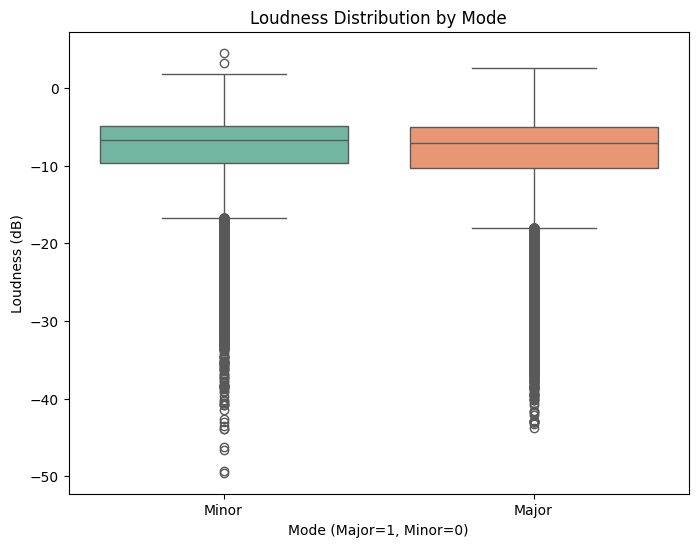

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='loudness', data=df, palette='Set2')
plt.title('Loudness Distribution by Mode')
plt.xlabel('Mode (Major=1, Minor=0)')
plt.ylabel('Loudness (dB)')
plt.xticks([0, 1], ['Minor', 'Major'])
plt.show()

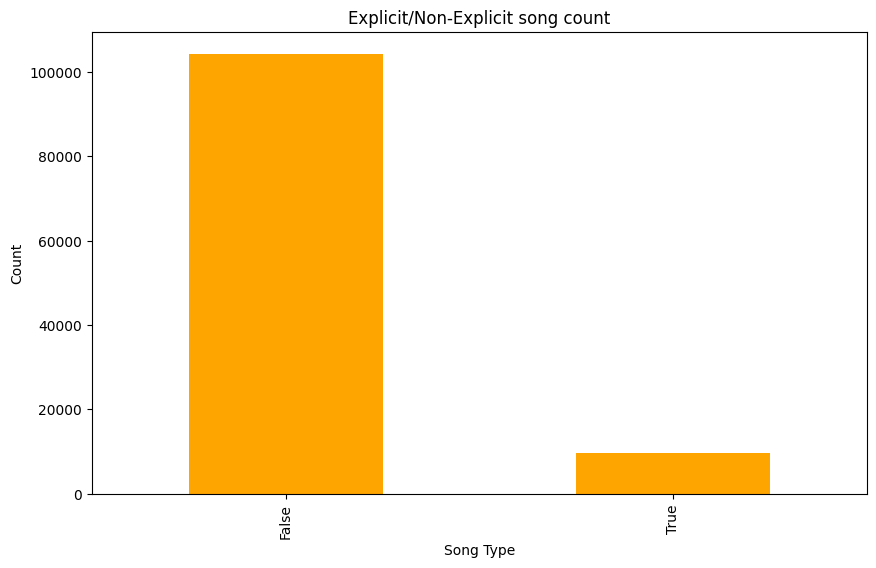

In [56]:
music_explicit=df['explicit'].value_counts()
plt.figure(figsize=(10,6))
music_explicit.plot(kind='bar',color='orange')
plt.title('Explicit/Non-Explicit song count')
plt.xlabel('Song Type')
plt.ylabel('Count')
plt.show()

<ipython-input-57-f8fc0838c43d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='track_genre', y='energy', data=df, palette='Set2')


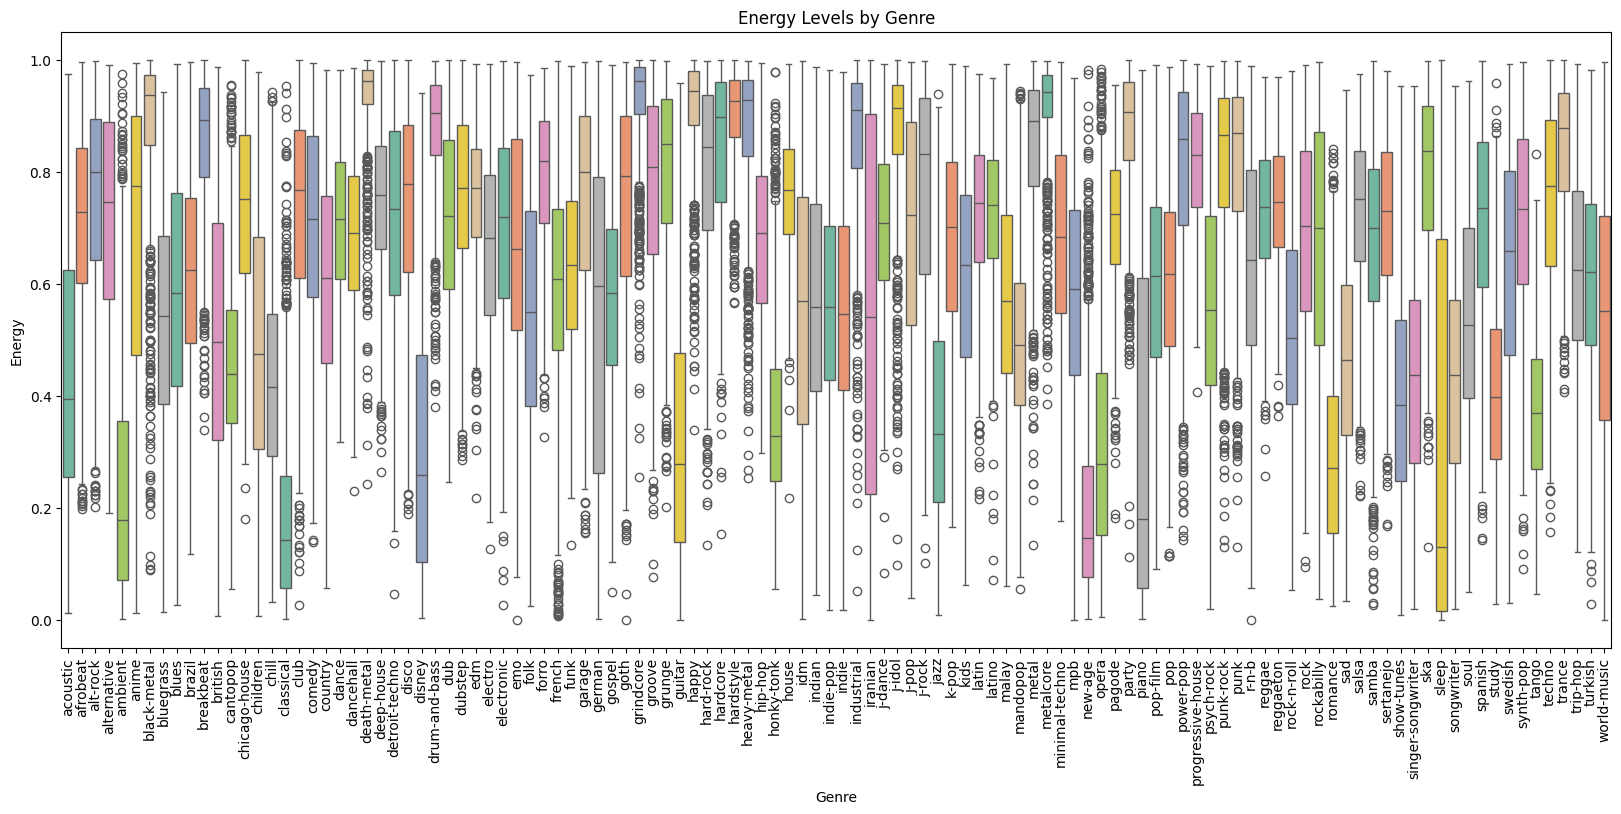

In [57]:
# Plotting a box plot of energy by genre
plt.figure(figsize=(20, 8))
sns.boxplot(x='track_genre', y='energy', data=df, palette='Set2')
plt.title('Energy Levels by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=90)
plt.show()

In [58]:
max_duration_ms = df['duration_ms'].max()

max_duration_ms=max_duration_ms/1000;
max_duration_ms=max_duration_ms/60
print(f'Maximum Track Duration in minutes: {max_duration_ms:.2f}')

Maximum Track Duration in minutes: 87.29


In [59]:
min_duration_ms = df['duration_ms'].min()
min_duration_ms=min_duration_ms/1000;
min_duration_ms=min_duration_ms/60
print(f'Minimum Track Duration in minutes: {min_duration_ms:.2f}')


Minimum Track Duration in minutes: 0.00


In [60]:
#THIS DOES NOT SEEM CORRECT

In [61]:
df=df[df['artists'] != 'x']


In [62]:
song=df['duration_ms'].idxmin()
shortest_song=df.loc[song]
print(shortest_song)

artists                         Leila Bela
album_name                     Angra Manyu
track_name          The Exorsism Begins...
popularity                               0
duration_ms                           8586
explicit                             False
danceability                           0.0
energy                                0.04
key                                      8
loudness                           -29.714
mode                                     0
speechiness                            0.0
acousticness                         0.928
instrumentalness                     0.956
liveness                             0.115
valence                                0.0
tempo                                  0.0
time_signature                           0
track_genre                        iranian
Name: 59310, dtype: object


In [63]:
song=df['duration_ms'].idxmax()
longest_song=df.loc[song]
print(longest_song)

artists                           Tale Of Us
album_name                Unity (Voyage Mix)
track_name          Unity (Voyage Mix) Pt. 1
popularity                                35
duration_ms                          5237295
explicit                               False
danceability                           0.695
energy                                 0.736
key                                        5
loudness                             -11.371
mode                                       0
speechiness                           0.0374
acousticness                         0.00399
instrumentalness                        0.86
liveness                               0.091
valence                               0.0509
tempo                                124.001
time_signature                             4
track_genre                   minimal-techno
Name: 73617, dtype: object


In [64]:
#WE HAVE THE SHORTEST AND LONGEST TRACKS

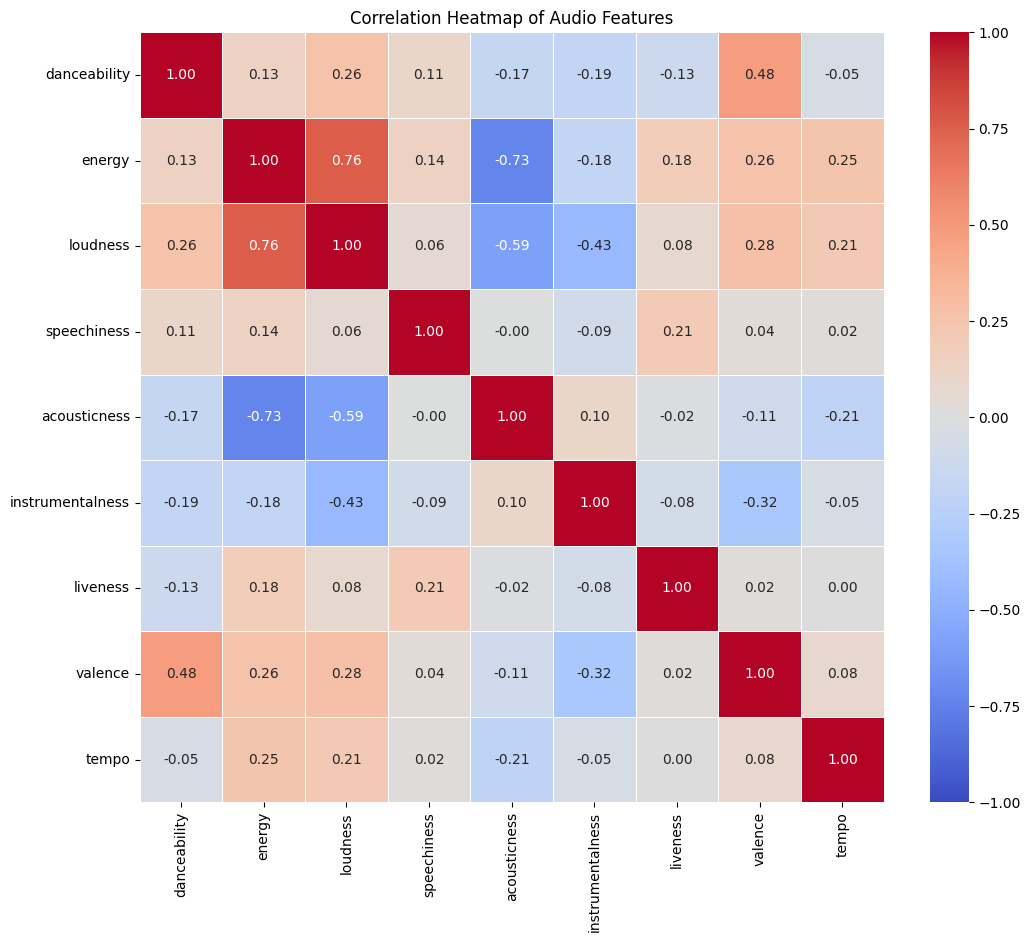

In [65]:
cols_to_correlate = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

corr_matrix = df[cols_to_correlate].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()